# Telco Customer Churn Prediction

### 1.1 Introduction

Telco receives a lot of customers who subscribe to their service to get access to the fastest possible communication access through mobile and internet services. There are diverse set of applications which Telco gives to their users such as mobile services and communication tools to name a few. 

One of the challenges that the company faces is to get to know beforehand whether a customer who has activated a service under Telco is going to leave or stay in the service (churn). If they know that a customer is going to leave the service based on a set of factors such as Gender and whether they are Senior citizen or not, they can come up with affordable plans or give promotional offers so that they retain the customer without them having to move to options from other companies. 

### 1.2 Machine Learning and Data Science

There are a lot of technologies and tools which are build with the aid of machine learning and data science. Considering that the data size is large and has useful features, it is possible to gain insights from the data and make predictions. After performing sufficient training and hyperparameter tuning, it is possible to get the best predictions for our models.

We try to combat the challenge by Telco with the aid of data science and machine learning. We take the output variable (Customer Churn) and we try to build the models for prediction with diverse set of features respectively. 



### 1.3 Metrics

Since we are working on a classification problem, we need to ensure we select the metrics that are useful for these problems. Below are the metrics that we are going to be using for our problem. 

1. Log Loss 
2. Accuracy
3. Precision
4. Recall
5. F1-score

### 1.4 Source 

The data was downloaded from Kaggle - a website that hosts data science and machine learning challenges from companies. Below is the link for the dataset along with the definition of various columns used in the data. Feel free to take a look. 

https://www.kaggle.com/blastchar/telco-customer-churn

## Table of Contents

### 1. Telco Customer Churn Prediction

1.1 Introduction 

1.2 Machine Learning and Data Science 

1.3 Metrics

1.4 Source

1.5 Importing the libraries

1.6 Reading the first 5 rows

### 2. Exploratory Data Analysis 

2.1 Missingno

_____________________________________________________________________________________________________


### 1.5 Importing the libraries

It is now time to read the libraries that are important for our machine learning problem. There are libraries such as numpy that would ensure that we get to perform computation with arrays.

In addition, we import seaborn which is used for data visualization and plotting respectively. 

from sklearn, we import preprocessing library which contains StandardScaler we are going to be using for transformed our data respectively. 

Matplotlib is similar to seaborn for plotting. It is also sometimes convenient to use this library for plotting rather than solely relying on Seaborn. 

Pandas library is used to work with the dataframe and reading the values present in them. 

In [15]:
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df = pd.read_csv("Telco Customer Churn.csv")

### 1.6 Reading the first 5 rows

Let us explore the first 5 rows of our dataframe to get to understand the columns that we are going to be working in the data respectively. 

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Using 'describe' ensures that we are getting the values for the numerical columns such as the mean, standard deviation, minimum value and 1st, 2nd, 3rd and Maximum values. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 2.1 Missingno 

Missingno is a useful library to plot the missing values in our dataframe. If there are any missing values in our data, we get an output for that particular column with white stripes which indicates the presence of missing value.

Let us see from our data if there are any missing values present in them. 

In [10]:
import missingno as msno

<AxesSubplot:>

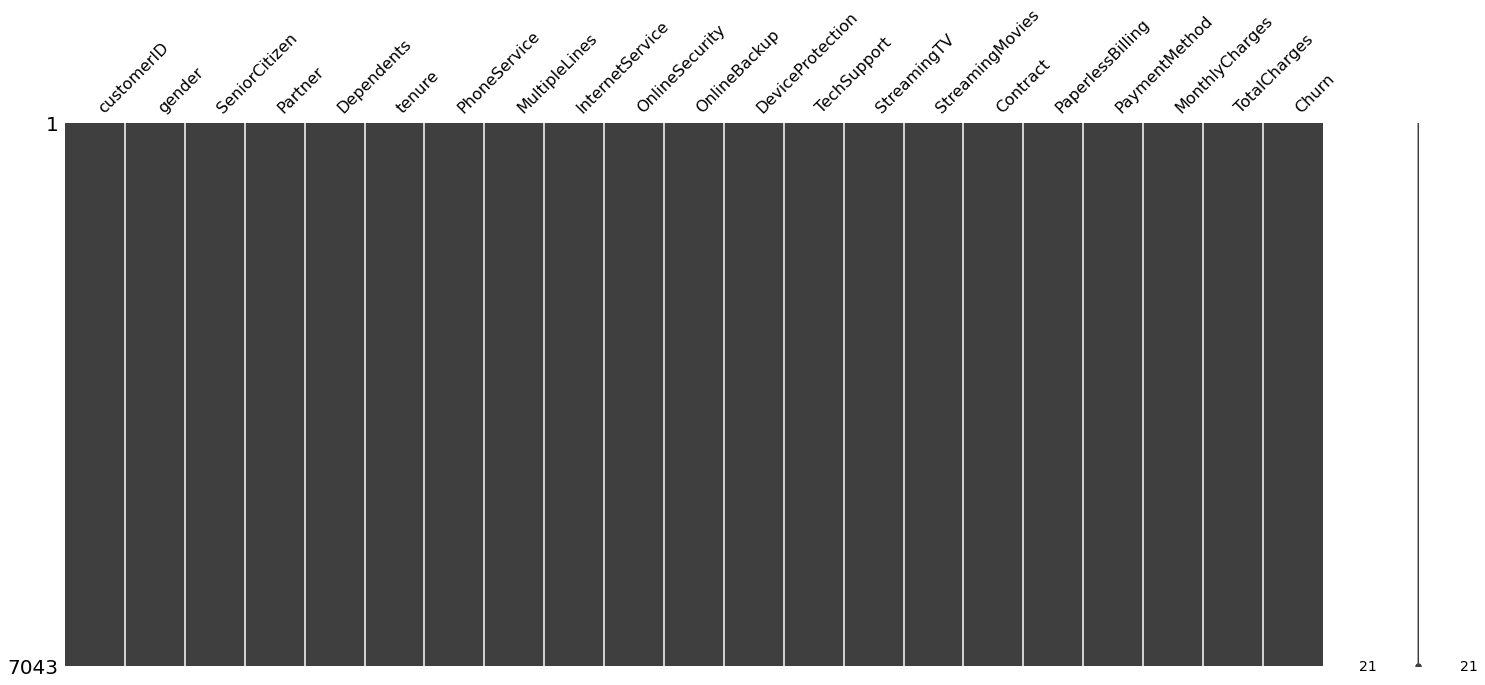

In [20]:
msno.matrix(df)

### Observation: 

We see that there are no missing values in our columsn as presented by the missingno plot. Therefore, we can start processing the data and understand it. 

In [13]:
print("The shape of the dataframe is: {}".format(df.shape))

The shape of the dataframe is: (7043, 21)


### Observation:

We are currently working with about 7043 customers with many attributes or features such as their gender and whether they are a senior citizen or not. There are many other features that we have considered that makes this problem interesting. 

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The above lists the columns that we are going to be working in our dataset. 

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [26]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
print("We are ensuring that there are no duplicate customers in our data")
print("The total number of unique customers in the data: {}".format(    len(df['customerID'].unique())))

We are ensuring that there are no duplicate customers in our data
The total number of unique customers in the data: 7043


In [41]:
df_categorical = df.select_dtypes(include = "object")

In [46]:
df_numerical = df.select_dtypes(exclude = "object")

In [47]:
print("The columns that are categorical in our data are:\n {}".format(df_categorical.columns))

The columns that are categorical in our data are:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [50]:
print("The columns that are numerical in our data are:\n {}".format(df_numerical.columns))

The columns that are numerical in our data are:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [55]:
pd.get_dummies(df_categorical.gender, drop_first = True).head()

,Male
0,0
1,1
2,1
3,1
4,0


In [57]:
df_dummy_encoding = pd.get_dummies(df_categorical, drop_first = True)

In [59]:
df_final = pd.concat([df_dummy_encoding, df_numerical], axis = 1)

In [61]:
df_final.head()

,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,...,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29.85
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,56.95
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,53.85
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,45,42.30
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,70.70


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
df_final.head()

,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,...,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29.85
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34,56.95
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,53.85
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,45,42.30
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,70.70


In [69]:
X = df_final.drop(['Churn_Yes'], axis = 1)
y = df_final['Churn_Yes']

In [70]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)